In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=810d0a872bbe79ac1e135268780f23fb


In [3]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

649

In [6]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | puerto escondido
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | northam
Processing Record 6 of Set 1 | zaragoza
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | vaitape
Processing Record 10 of Set 1 | nola
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | lerwick
Processing Record 16 of Set 1 | pitimbu
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | korla
Processing Record 19 of Set 1 | bubaque
Processing Record 20 of Set 1 | porto novo
Processing Record 21 of Set 1 | tuatapere
Processing Record 22 of Set 1 | avarua
Processing Record 23 of Set 1 | hamilton
Processing Record 24 of Set 1 | seoul
Processing Record

In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 50 of Set 13 | tasiilaq
Processing Record 51 of Set 13 | new norfolk
Processing Record 52 of Set 13 | puerto escondido
Processing Record 53 of Set 13 | bredasdorp
Processing Record 54 of Set 13 | northam
Processing Record 55 of Set 13 | zaragoza
Processing Record 56 of Set 13 | vaini
Processing Record 57 of Set 13 | saint george
Processing Record 58 of Set 13 | vaitape
Processing Record 59 of Set 13 | nola
Processing Record 60 of Set 13 | severo-kurilsk
Processing Record 61 of Set 13 | hermanus
Processing Record 62 of Set 13 | busselton
Processing Record 63 of Set 13 | clyde river
Processing Record 64 of Set 13 | lerwick
Processing Record 65 of Set 13 | pitimbu
Processing Record 66 of Set 13 | albany
Processing Record 67 of Set 13 | korla
Processing Record 68 of Set 13 | bubaque
Processing Record 69 of Set 13 | porto novo
Processing Record 70 of Set 13 | tuatapere
Processing Record 71 of Set 13 | avarua
Processing Record 72 of Set 13 | hamilton
Processing Record 73 of

Processing Record 40 of Set 16 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 16 | sakaiminato
Processing Record 42 of Set 16 | kerouane
Processing Record 43 of Set 16 | birao
Processing Record 44 of Set 16 | nizhniy bestyakh
Processing Record 45 of Set 16 | grafton
Processing Record 46 of Set 16 | te anau
Processing Record 47 of Set 16 | mattru
Processing Record 48 of Set 16 | ancud
Processing Record 49 of Set 16 | adrar
Processing Record 50 of Set 16 | mahebourg
Processing Record 1 of Set 17 | diapaga
Processing Record 2 of Set 17 | bargal
City not found. Skipping...
Processing Record 3 of Set 17 | tiksi
Processing Record 4 of Set 17 | teguldet
Processing Record 5 of Set 17 | lagoa
Processing Record 6 of Set 17 | mapiripan
Processing Record 7 of Set 17 | sibu
Processing Record 8 of Set 17 | san juan de la maguana
Processing Record 9 of Set 17 | nobeoka
Processing Record 10 of Set 17 | krivosheino
Processing Record 11 of Set 17 | xining
Processing Rec

Processing Record 28 of Set 20 | temaraia
City not found. Skipping...
Processing Record 29 of Set 20 | poso
Processing Record 30 of Set 20 | chenzhou
Processing Record 31 of Set 20 | tarauaca
Processing Record 32 of Set 20 | oranjemund
Processing Record 33 of Set 20 | takoradi
Processing Record 34 of Set 20 | wasilla
Processing Record 35 of Set 20 | denpasar
Processing Record 36 of Set 20 | at-bashi
Processing Record 37 of Set 20 | cine
Processing Record 38 of Set 20 | evensk
Processing Record 39 of Set 20 | imeni babushkina
Processing Record 40 of Set 20 | sorland
Processing Record 41 of Set 20 | conceicao das alagoas
Processing Record 42 of Set 20 | atar
Processing Record 43 of Set 20 | huangmei
Processing Record 44 of Set 20 | prince rupert
Processing Record 45 of Set 20 | batagay-alyta
Processing Record 46 of Set 20 | rocha
Processing Record 47 of Set 20 | afmadu
City not found. Skipping...
Processing Record 48 of Set 20 | lubango
Processing Record 49 of Set 20 | pyapon
Processing 

Processing Record 13 of Set 24 | la orilla
Processing Record 14 of Set 24 | rafaela
Processing Record 15 of Set 24 | yumen
Processing Record 16 of Set 24 | muros
Processing Record 17 of Set 24 | touros
Processing Record 18 of Set 24 | kremenki
Processing Record 19 of Set 24 | neryungri
Processing Record 20 of Set 24 | gushikawa
Processing Record 21 of Set 24 | camocim
Processing Record 22 of Set 24 | volksrust
Processing Record 23 of Set 24 | juayua
Processing Record 24 of Set 24 | dzaoudzi
Processing Record 25 of Set 24 | tiarei
Processing Record 26 of Set 24 | gazanjyk
Processing Record 27 of Set 24 | thinadhoo
Processing Record 28 of Set 24 | palabuhanratu
City not found. Skipping...
Processing Record 29 of Set 24 | bulgan
Processing Record 30 of Set 24 | pacific grove
Processing Record 31 of Set 24 | chihuahua
Processing Record 32 of Set 24 | lodja
Processing Record 33 of Set 24 | normandin
Processing Record 34 of Set 24 | bajo baudo
City not found. Skipping...
Processing Record 35

In [8]:
len(city_data)

598

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,12.20,73,20,2.30,GL,2021-01-22 01:30:53
1,New Norfolk,-42.7826,147.0587,75.00,44,97,4.00,AU,2021-01-22 01:30:55
2,Puerto Escondido,15.8500,-97.0667,78.80,73,20,3.42,MX,2021-01-22 01:38:56
3,Bredasdorp,-34.5322,20.0403,68.00,88,21,3.44,ZA,2021-01-22 01:31:06
4,Northam,51.0333,-4.2167,42.01,86,93,5.01,GB,2021-01-22 01:32:01
5,Zaragoza,41.6561,-0.8773,55.40,67,75,3.44,ES,2021-01-22 01:38:24
6,Vaini,-21.2000,-175.2000,86.00,79,75,14.97,TO,2021-01-22 01:31:09
7,Saint George,37.1041,-113.5841,57.20,38,1,4.61,US,2021-01-22 01:30:29
8,Vaitape,-16.5167,-151.7500,81.57,72,2,17.72,PF,2021-01-22 01:38:57
9,Nola,40.9220,14.5329,57.00,80,73,6.31,IT,2021-01-22 01:38:57


In [10]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2021-01-22 01:30:53,65.6145,-37.6368,12.20,73,20,2.30
1,New Norfolk,AU,2021-01-22 01:30:55,-42.7826,147.0587,75.00,44,97,4.00
2,Puerto Escondido,MX,2021-01-22 01:38:56,15.8500,-97.0667,78.80,73,20,3.42
3,Bredasdorp,ZA,2021-01-22 01:31:06,-34.5322,20.0403,68.00,88,21,3.44
4,Northam,GB,2021-01-22 01:32:01,51.0333,-4.2167,42.01,86,93,5.01


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

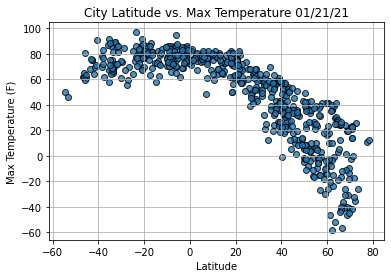

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_maxtemp.png")

# Show plot.
plt.show()

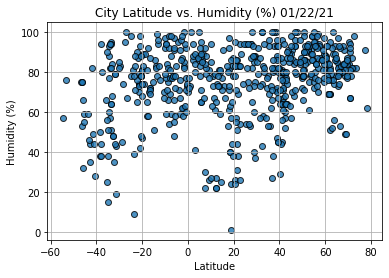

In [56]:
# Build the scatter plot for latitude vs. humidity %.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_humidity.png")

# Show plot.
plt.show()

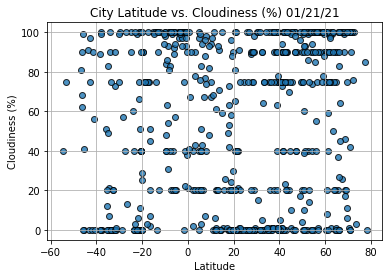

In [17]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_cloudiness.png")

# Show plot.
plt.show()

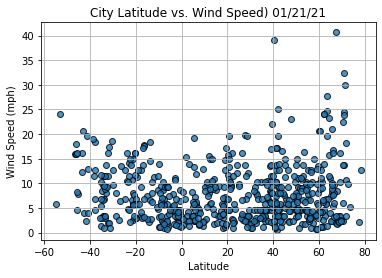

In [18]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_windspeed.png")

# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

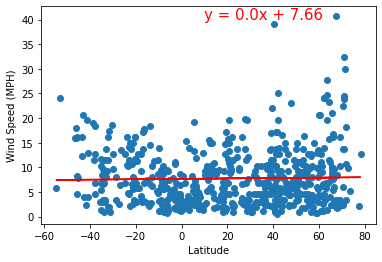

In [22]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, wind_speed)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,wind_speed)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.show()

## Create a Linear Regression Function

In [41]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
#Create Norther and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

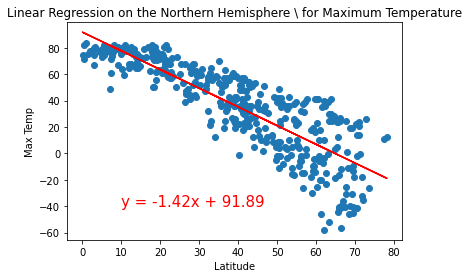

In [44]:
# Linear regression on the Northern Hemisphere (Max Temp)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \ for Maximum Temperature", 'Max Temp',(10,-40))

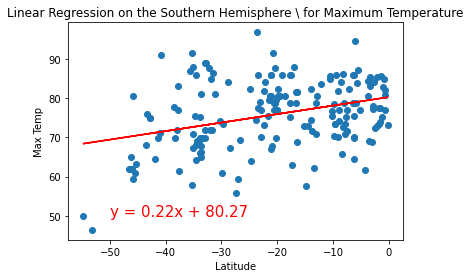

In [46]:
# Linear regression on the Southern Hemisphere (Max Temp)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \ for Maximum Temperature", 'Max Temp',(-50, 50))

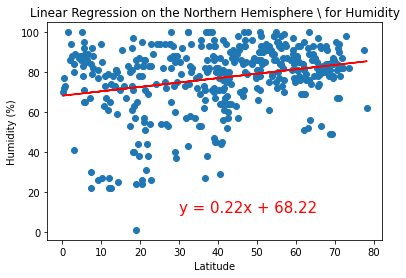

In [51]:
# Linear regression on the Northern Hemisphere (% Humidity)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \ for Humidity", 'Humidity (%)',(30, 10))

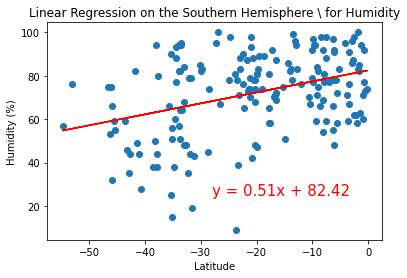

In [54]:
# Linear regression on the Southern Hemisphere (% Humidity)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \ for Humidity", 'Humidity (%)',(-28, 25))

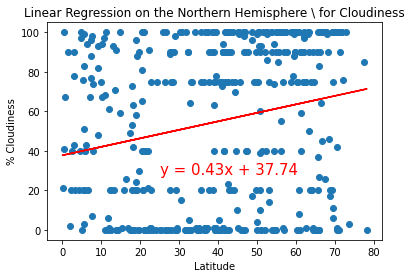

In [60]:
# Linear regression on the Northern Hemisphere (% Cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \ for Cloudiness", '% Cloudiness',(25, 28))

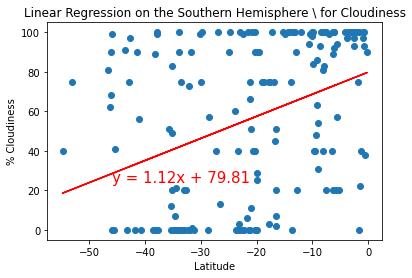

In [69]:
# Linear regression on the Southern Hemisphere (% Cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \ for Cloudiness", '% Cloudiness',(-46, 24))

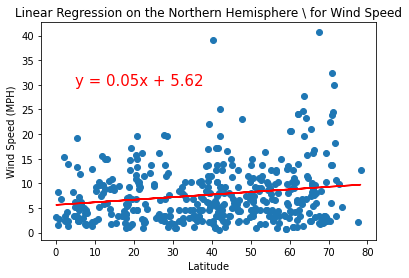

In [72]:
# Linear regression on the Northern Hemisphere (Wind Speed)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \ for Wind Speed", 'Wind Speed (MPH)',(5, 30))

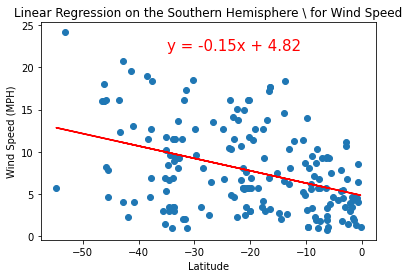

In [74]:
# Linear regression on the Southern Hemisphere (Wind Speed)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \ for Wind Speed", 'Wind Speed (MPH)',(-35, 22))